In [2]:
data = {
 'Alan Perlis': { 
 'Artificial intelligence': 1.46, 
 'Systems programming': 5.0, 
 'Software engineering': 3.34, 
 'Databases': 2.32
 },'Marvin Minsky': { 
 'Artificial intelligence': 5.0, 
 'Systems programming': 2.54,
 'Computation': 4.32, 
 'Algorithms': 2.76
 },'John McCarthy': { 
 'Artificial intelligence': 5.0, 
 'Programming language theory': 4.72, 
 'Systems programming': 3.25, 
 'Concurrency': 3.61, 
 'Formal methods': 3.58,
 'Computation': 3.23, 
 'Algorithms': 3.03 
 },'Edsger Dijkstra': { 
 'Programming language theory': 4.34, 
 'Systems programming': 4.52,
 'Software engineering': 4.04, 
 'Concurrency': 3.97,
 'Formal methods': 5.0, 
 'Algorithms': 4.92 
 },'Donald Knuth': { 
 'Programming language theory': 4.33, 
 'Systems programming': 3.57,
 'Computation': 4.39, 
 'Algorithms': 5.0 
 },'John Backus': { 
 'Programming language theory': 4.58, 
 'Systems programming': 4.43,
 'Software engineering': 4.38, 
 'Formal methods': 2.42, 
 'Databases': 2.80 
 },'Robert Floyd': { 
 'Programming language theory': 4.24, 
 'Systems programming': 2.17,
 'Concurrency': 2.92, 
 'Formal methods': 5.0, 
 'Computation': 3.18, 
 'Algorithms': 5.0 
 },'Tony Hoare': { 
 'Programming language theory': 4.64, 
 'Systems programming': 4.38,
 'Software engineering': 3.62, 
 'Concurrency': 4.88,
 'Formal methods': 4.72, 
 'Algorithms': 4.38
 },'Edgar Codd': { 
 'Systems programming': 4.60, 
 'Software engineering': 3.54,
 'Concurrency': 4.28, 
 'Formal methods': 1.53, 
 'Databases': 5.0
 },'Dennis Ritchie': { 
 'Programming language theory': 3.45, 
 'Systems programming': 5.0,
 'Software engineering': 4.83,
 },'Niklaus Wirth': { 
 'Programming language theory': 4.23, 
 'Systems programming': 4.22,
 'Software engineering': 4.74, 
 'Formal methods': 3.83, 
 'Algorithms': 3.95
 },'Robin Milner': { 
 'Programming language theory': 5.0, 
 'Systems programming': 1.66,
 'Concurrency': 4.62, 
 'Formal methods': 3.94,
 },'Leslie Lamport': { 
 'Programming language theory': 1.5, 
 'Systems programming': 2.76,
 'Software engineering': 3.76, 
 'Concurrency': 5.0,
 'Formal methods': 4.93, 
 'Algorithms': 4.63
 },'Michael Stonebraker': { 
 'Systems programming': 4.67, 
 'Software engineering': 3.86,
 'Concurrency': 4.14, 
 'Databases': 5.0,
 },
}

<b>In this data : Michael Stonebraker rates the book Systems Programming 4.67, while Leslie Ramport rates Concurrency as 5.0
A simple problem to solve could be using this dataset anf a recommender system, is  how likely Marvim Minsky is to like book Programming languauge theory.<br><br>
In order to solve this kind of problems, we need a way to <b>measure how similar people are based on their rankings.</b>
A naive but popular approach is to compare every pair and find a <b>similarity score.</b>
The most common approaches to the similarity problem are score by 
<b><font color = 'red'>Euclidean Distance</font></b> and using the <b><font color = 'red'>Pearson Correlation Coefficient</font></b>

In [41]:
import pandas as pd
df = pd.DataFrame(data)
df.reset_index(inplace=True)
df.rename(columns = {'index': 'Book'}, inplace = True)

In [69]:
df

,Book,Alan Perlis,Marvin Minsky,John McCarthy,Edsger Dijkstra,Donald Knuth,John Backus,Robert Floyd,Tony Hoare,Edgar Codd,Dennis Ritchie,Niklaus Wirth,Robin Milner,Leslie Lamport,Michael Stonebraker
0,Algorithms,NaN,2.76,3.03,4.92,5.00,NaN,5.00,4.38,NaN,NaN,3.95,NaN,4.63,NaN
1,Artificial intelligence,1.46,5.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Computation,NaN,4.32,3.23,NaN,4.39,NaN,3.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Concurrency,NaN,NaN,3.61,3.97,NaN,NaN,2.92,4.88,4.28,NaN,NaN,4.62,5.00,4.14
4,Databases,2.32,NaN,NaN,NaN,NaN,2.80,NaN,NaN,5.00,NaN,NaN,NaN,NaN,5.00
5,Formal methods,NaN,NaN,3.58,5.00,NaN,2.42,5.00,4.72,1.53,NaN,3.83,3.94,4.93,NaN
6,Programming language theory,NaN,NaN,4.72,4.34,4.33,4.58,4.24,4.64,NaN,3.45,4.23,5.00,1.50,NaN
7,Software engineering,3.34,NaN,NaN,4.04,NaN,4.38,NaN,3.62,3.54,4.83,4.74,NaN,3.76,3.86
8,Systems programming,5.00,2.54,3.25,4.52,3.57,4.43,2.17,4.38,4.60,5.00,4.22,1.66,2.76,4.67


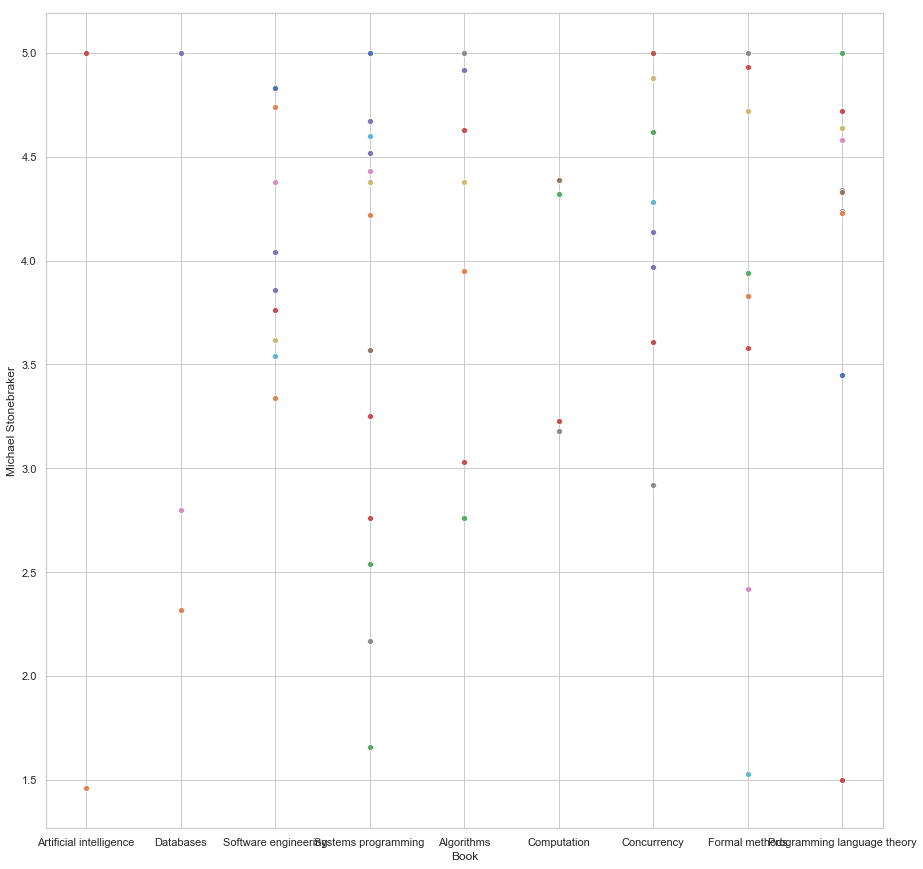

In [68]:
# import seaborn as sns
users = [user for user in df.columns if user!='Book']
sns.set(style= 'whitegrid', rc = {'figure.figsize' : (15,15)}, )
fig = sns.scatterplot(x = 'Book', y ='Alan Perlis', data = df)
for user in users:
    sns.scatterplot(x = 'Book', y = user, ax = fig, data = df, legend='full')
    
# fig = sns.scatterplot(x = 'Book', y =y, data = df)


In [62]:
users[0]

'Alan Perlis'

In [91]:
df.index

Index(['Algorithms', 'Artificial intelligence', 'Computation', 'Concurrency',
       'Databases', 'Formal methods', 'Programming language theory',
       'Software engineering', 'Systems programming'],
      dtype='object', name='Book')

In [90]:
df

,Book,Alan Perlis,Marvin Minsky,John McCarthy,Edsger Dijkstra,Donald Knuth,John Backus,Robert Floyd,Tony Hoare,Edgar Codd,Dennis Ritchie,Niklaus Wirth,Robin Milner,Leslie Lamport,Michael Stonebraker
Book,,,,,,,,,,,,,,,
Algorithms,Algorithms,NaN,2.76,3.03,4.92,5.00,NaN,5.00,4.38,NaN,NaN,3.95,NaN,4.63,NaN
Artificial intelligence,Artificial intelligence,1.46,5.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Computation,Computation,NaN,4.32,3.23,NaN,4.39,NaN,3.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Concurrency,Concurrency,NaN,NaN,3.61,3.97,NaN,NaN,2.92,4.88,4.28,NaN,NaN,4.62,5.00,4.14
Databases,Databases,2.32,NaN,NaN,NaN,NaN,2.80,NaN,NaN,5.00,NaN,NaN,NaN,NaN,5.00
Formal methods,Formal methods,NaN,NaN,3.58,5.00,NaN,2.42,5.00,4.72,1.53,NaN,3.83,3.94,4.93,NaN
Programming language theory,Programming language theory,NaN,NaN,4.72,4.34,4.33,4.58,4.24,4.64,NaN,3.45,4.23,5.00,1.50,NaN
Software engineering,Software engineering,3.34,NaN,NaN,4.04,NaN,4.38,NaN,3.62,3.54,4.83,4.74,NaN,3.76,3.86
Systems programming,Systems programming,5.00,2.54,3.25,4.52,3.57,4.43,2.17,4.38,4.60,5.00,4.22,1.66,2.76,4.67


In [99]:
x = df.loc["Systems programming"]
y = df.loc['Programming language theory']

# Euclidean Distance Score

Euclean Distance between two points is the length of the line segments connecting them. Our Euclidean space in this particular case is the positive portion of the plane where the axes are the ranked items and the points represent

In [113]:
def euclidean_similarity(person1, person2):
    
    common_ranked_items = [itm for itm in data[person1] 
                           if itm in data[person2]]
#     print(common_ranked_items)
    rankings_by_user = [(data[person1][itm], data[person2][itm])
               for itm in common_ranked_items]
#     print(rankings_by_user)
    distance = [pow(rank[0] - rank[1], 2) for rank in rankings_by_user]
#     print(distance)
    
    return 1 / (1+ sum(distance))

In [114]:
euclidean_similarity('Robin Milner', 'Leslie Lamport')

['Programming language theory', 'Systems programming', 'Concurrency', 'Formal methods']
[(5.0, 1.5), (1.66, 2.76), (4.62, 5.0), (3.94, 4.93)]
[12.25, 1.2099999999999997, 0.14439999999999992, 0.9800999999999995]


0.06416631909910489

The major flaw of this algorithm, and in genral of Euclidean distance based comparisons, is that if the whole distribution of rankings from a person tends to be higher than those from other person<b>(a person is inclined to give higher scores tha the other)</b>, this metric would classify them as dissimilar without regard the correaltion between two people.

# Pearson correlation Coefficient

The Pearson correaltion coefficient is <b>a measure of the linear dependence of coorealtion between two variables X and Y.</b> <br>
The PCC is better understood in this case as <b><font color = 'red'>a measure of the slope of two datasets related by a single line</font></b>. By using this method we are eliminating the weight of harshness while meausuring the relation between two people.<br><br>
The PCC algorithm, requires two datasets as inputs, those datsets don't come from how people ranked the items, but they come from the common ranked items between two people. PCC helps us to find the similarity of a pair of users. 

In [117]:
import math
def pearson_similarity(person1, person2):
    
    common_ranked_items = [itm for itm in data[person1]
                            if itm in data[person2]]
    n = len(common_ranked_items)
    s1 = sum([data[person1][item] for item in common_ranked_items])
    s2 = sum([data[person2][item] for item in common_ranked_items])
    
    ss1 = sum([pow(data[person1][item], 2) for item in common_ranked_items])
    ss2 = sum([pow(data[person2][item], 2) for item in common_ranked_items])
    ps = sum([data[person1][item] * data[person2][item] for item in common_ranked_items])
    numerator = n * ps - (s1 * s2)
    denominator = math.sqrt((n * ss1 - math.pow(s1, 2)) * (n * ss2 - math.pow(s2, 2)))
    
    return (numerator/denominator) if denominator!=0 else 0

In [118]:
pearson_similarity('Robin Milner', 'Leslie Lamport')

0.07959368299554316

# Recommender Function

In [169]:
def recommend(person, bound, similarity = pearson_similarity):
    scores = [(similarity(person, other), other)
              for other in data if other!=person]
    scores.sort()
    scores.reverse()
    scores = scores[0 : bound]
    
    recomms = {}
    
    for sim, other in scores:
        ranked = data[other]
        for itm in ranked:
            if itm not in data[person]:
                weight = sim * ranked[itm]
                
            if itm in recomms:
                s, weights = recomms[itm]
                recomms[itm] = (s + sim, weights + [weight])
            else:
                recomms[itm] = (sim, [weight])
                
    for r in recomms:
        sim, item = recomms[r]
        recomms[r] = sum(item) / sim
        
    return recomms

In [170]:
recommend("Alan Perlis", 2)

{'Programming language theory': 4.490000000000001,
 'Systems programming': 4.490000000000001,
 'Software engineering': 4.490000000000001,
 'Concurrency': 4.425000000000007,
 'Formal methods': 4.859999999999998,
 'Algorithms': 4.649999999999996}